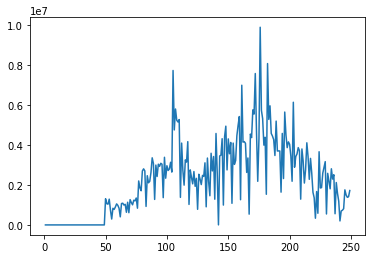

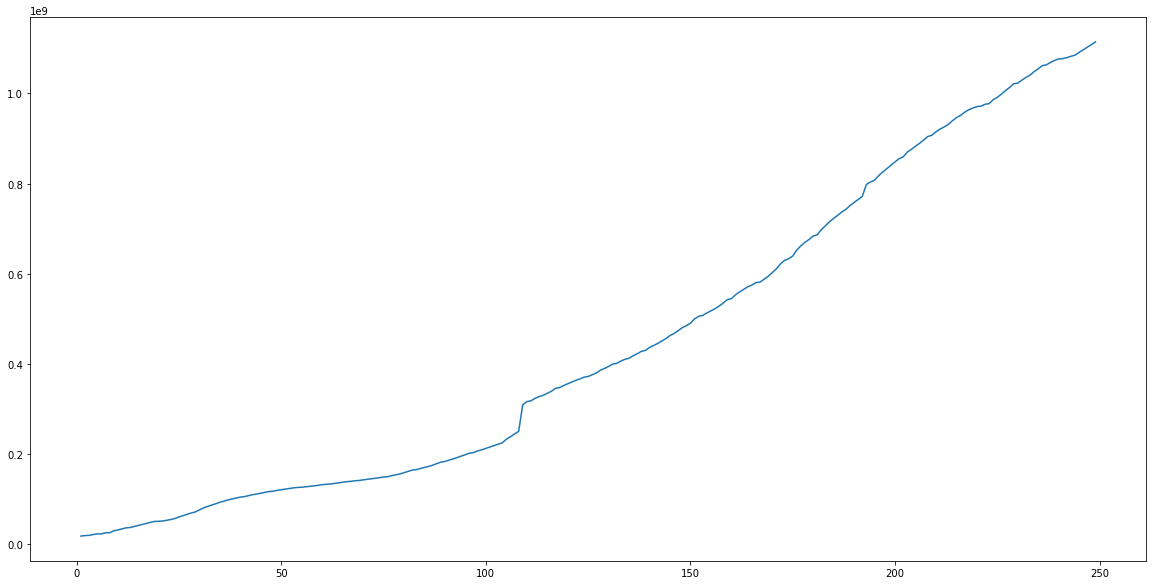

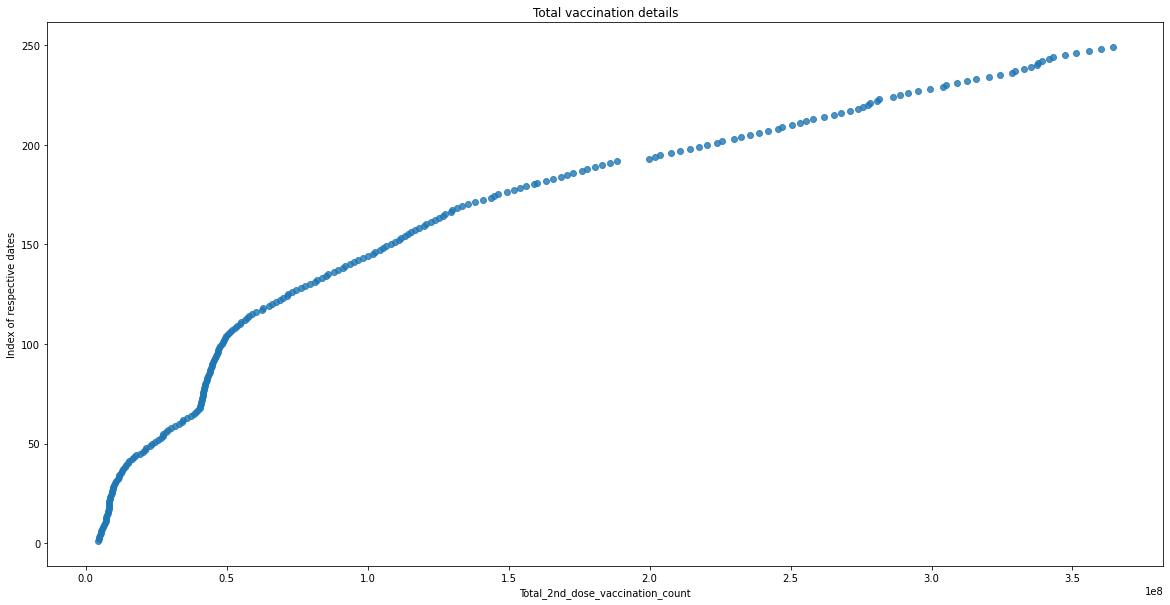

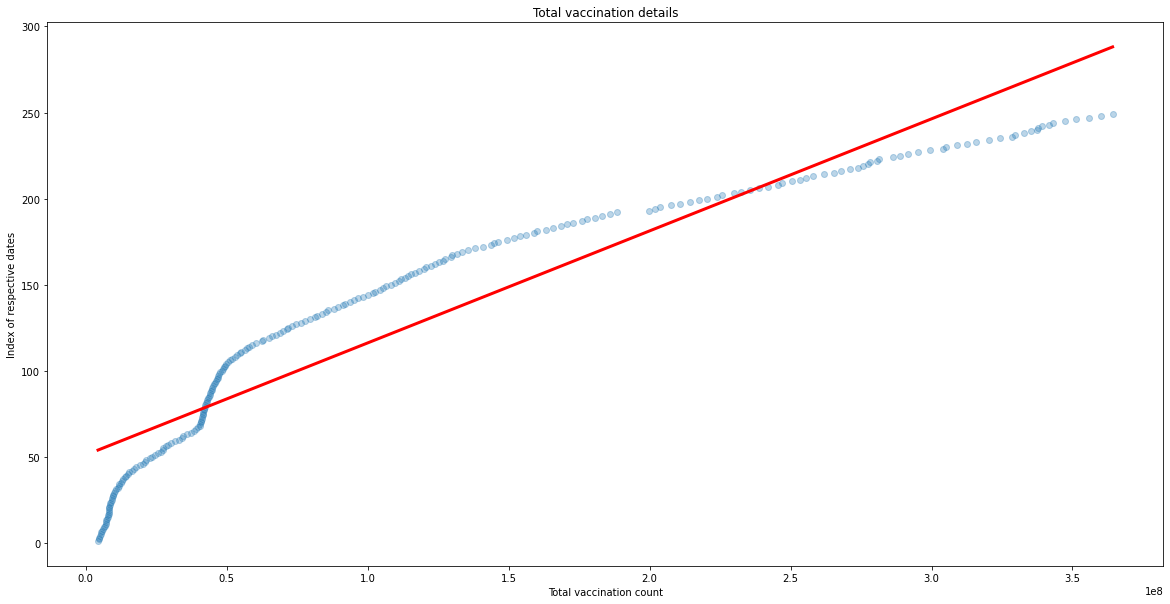

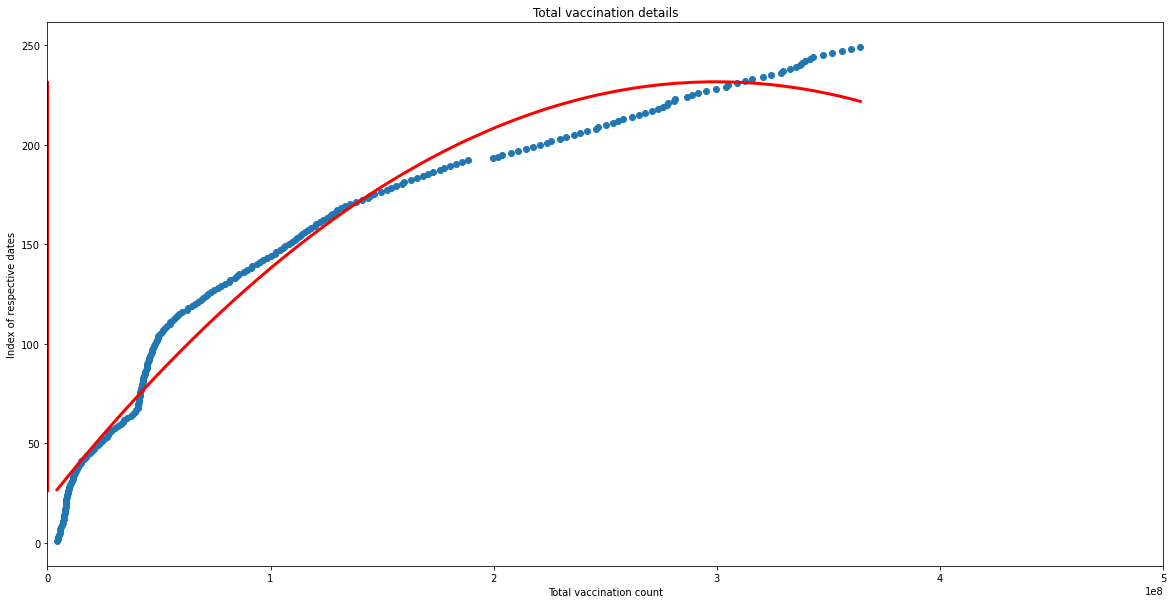

In [1]:
# importing pk_vaccination.ipynb

%run pk_vaccination.ipynb

In [2]:
vaccine_dataframe

,date_index,dates_vaccine,total,male,female,others,covishield,covaxin,today,tot_dose_1,...,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
1,1,2021-03-09,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-03-10,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-03-11,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-03-12,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2021-03-13,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,2021-11-08,1091116115,560933286,525758616,245085,963065430,122778644,5874968,743728094.0,...,1755965.0,4119003.0,2941009.0,2932427.0,1531.0,162.0,1092913.0,2373297.0,821608.0,1551689.0
246,246,2021-11-09,1096713028,563722357,528564992,246551,968139879,123299280,5237586,745367580.0,...,1501316.0,3736270.0,2607509.0,2628688.0,1388.0,125.0,1094741.0,5896426.0,1765558.0,4130868.0
247,247,2021-11-10,1102688458,566669979,531591379,247972,973528193,123884730,5722747,746844650.0,...,1381815.0,4340932.0,2818834.0,2902543.0,1370.0,134.0,1096407.0,5258251.0,1509582.0,3748669.0
248,248,2021-11-11,1108298674,569448088,534422115,249343,978600270,124421367,5341461,748342860.0,...,1411804.0,3929657.0,2642723.0,2697416.0,1321.0,144.0,1097909.0,5745928.0,1388964.0,4356964.0


In [3]:
import plotly.express as px

import dash
import dash_bootstrap_components as dbc
from dash import dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

C:\Users\PARTH\anaconda3\lib\site-packages\dash_bootstrap_components\table.py:1: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [4]:
from IPython.display import HTML
from urllib.request import urlopen

In [10]:
app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = html.Div([sidebar, content])

In [9]:
sidebar = html.Div(
    [
        html.H2('Parameters', style=TEXT_STYLE),
        html.Hr(),
        controls
    ],
    style=SIDEBAR_STYLE,
)

In [8]:
controls = dbc.FormGroup(
    [
        html.P('Dropdown', style={
            'textAlign': 'center'
        }),
        dcc.Dropdown(
            id='dropdown',
            options=[{
                'label': 'Value One',
                'value': 'value1'
            }, {
                'label': 'Value Two',
                'value': 'value2'
            },
                {
                    'label': 'Value Three',
                    'value': 'value3'
                }
            ],
            value=['value1'],  # default value
            multi=True
        ),
        html.Br(),
        html.P('Range Slider', style={
            'textAlign': 'center'
        }),
        dcc.RangeSlider(
            id='range_slider',
            min=0,
            max=20,
            step=0.5,
            value=[5, 15]
        ),
        html.P('Check Box', style={
            'textAlign': 'center'
        }),
        dbc.Card([dbc.Checklist(
            id='check_list',
            options=[{
                'label': 'Value One',
                'value': 'value1'
            },
                {
                    'label': 'Value Two',
                    'value': 'value2'
                },
                {
                    'label': 'Value Three',
                    'value': 'value3'
                }
            ],
            value=['value1', 'value2'],
            inline=True
        )]),
        html.Br(),
        html.P('Radio Items', style={
            'textAlign': 'center'
        }),
        dbc.Card([dbc.RadioItems(
            id='radio_items',
            options=[{
                'label': 'Value One',
                'value': 'value1'
            },
                {
                    'label': 'Value Two',
                    'value': 'value2'
                },
                {
                    'label': 'Value Three',
                    'value': 'value3'
                }
            ],
            value='value1',
            style={
                'margin': 'auto'
            }
        )]),
        html.Br(),
        dbc.Button(
            id='submit_button',
            n_clicks=0,
            children='Submit',
            color='primary',
           # block=True
        ),
    ]
)


In [7]:
content = html.Div(
    [
        html.H2('Analytics Dashboard Template', style=TEXT_STYLE),
        html.Hr(),
        content_first_row,
        content_second_row,
        content_third_row,
        content_fourth_row
    ],
    style=CONTENT_STYLE
)

In [6]:
content_first_row = dbc.Row([
    dbc.Col(
        dbc.Card(
            [

                dbc.CardBody(
                    [
                        html.H4(id='card_title_1', children=['Card Title 1'], className='card-title',
                                style=CARD_TEXT_STYLE),
                        html.P(id='card_text_1', children=['Sample text.'], style=CARD_TEXT_STYLE),
                    ]
                )
            ]
        ),
        md=3
    ),
    dbc.Col(
        dbc.Card(
            [

                dbc.CardBody(
                    [
                        html.H4('Card Title 2', className='card-title', style=CARD_TEXT_STYLE),
                        html.P('Sample text.', style=CARD_TEXT_STYLE),
                    ]
                ),
            ]

        ),
        md=3
    ),
    dbc.Col(
        dbc.Card(
            [
                dbc.CardBody(
                    [
                        html.H4('Card Title 3', className='card-title', style=CARD_TEXT_STYLE),
                        html.P('Sample text.', style=CARD_TEXT_STYLE),
                    ]
                ),
            ]

        ),
        md=3
    ),
    dbc.Col(
        dbc.Card(
            [
                dbc.CardBody(
                    [
                        html.H4('Card Title 4', className='card-title', style=CARD_TEXT_STYLE),
                        html.P('Sample text.', style=CARD_TEXT_STYLE),
                    ]
                ),
            ]
        ),
        md=3
    )
])

content_second_row = dbc.Row(
    [
        dbc.Col(
            dcc.Graph(id='graph_1'), md=4
        ),
        dbc.Col(
            dcc.Graph(id='graph_2'), md=4
        ),
        dbc.Col(
            dcc.Graph(id='graph_3'), md=4
        )
    ]
)

content_third_row = dbc.Row(
    [
        dbc.Col(
            dcc.Graph(id='graph_4'), md=12,
        )
    ]
)

content_fourth_row = dbc.Row(
    [
        dbc.Col(
            dcc.Graph(id='graph_5'), md=6
        ),
        dbc.Col(
            dcc.Graph(id='graph_6'), md=6
        )
    ]
)


In [11]:
@app.callback(
    Output('graph_1', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('range_slider', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_graph_1(n_clicks, dropdown_value, range_slider_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(range_slider_value)
    print(check_list_value)
    print(radio_items_value)
    fig = {
        'data': [{
            'x': [1, 2, 3],
            'y': [3, 4, 5]
        }]
    }
    return fig

In [12]:
@app.callback(
    Output('graph_2', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('range_slider', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_graph_2(n_clicks, dropdown_value, range_slider_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(range_slider_value)
    print(check_list_value)
    print(radio_items_value)
    fig = {
        'data': [{
            'x': [1, 2, 3],
            'y': [3, 4, 5],
            'type': 'bar'
        }]
    }
    return fig


In [13]:
@app.callback(
    Output('graph_3', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('range_slider', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_graph_3(n_clicks, dropdown_value, range_slider_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(range_slider_value)
    print(check_list_value)
    print(radio_items_value)
    df = px.data.iris()
    fig = px.density_contour(df, x='sepal_width', y='sepal_length')
    return fig

In [14]:
@app.callback(
    Output('graph_4', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('range_slider', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_graph_4(n_clicks, dropdown_value, range_slider_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(range_slider_value)
    print(check_list_value)
    print(radio_items_value)  # Sample data and figure
    df = px.data.gapminder().query('year==2007')
    fig = px.scatter_geo(df, locations='iso_alpha', color='continent',
                         hover_name='country', size='pop', projection='natural earth')
    fig.update_layout({
        'height': 600
    })
    return fig


In [15]:
@app.callback(
    Output('graph_5', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('range_slider', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_graph_5(n_clicks, dropdown_value, range_slider_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(range_slider_value)
    print(check_list_value)
    print(radio_items_value)  # Sample data and figure
    df = px.data.iris()
    fig = px.scatter(df, x='sepal_width', y='sepal_length')
    return fig




In [16]:
@app.callback(
    Output('graph_6', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('range_slider', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_graph_6(n_clicks, dropdown_value, range_slider_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(range_slider_value)
    print(check_list_value)
    print(radio_items_value)  # Sample data and figure
    df = px.data.tips()
    fig = px.bar(df, x='total_bill', y='day', orientation='h')
    return fig

In [17]:
@app.callback(
    Output('card_title_1', 'children'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('range_slider', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_card_title_1(n_clicks, dropdown_value, range_slider_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(range_slider_value)
    print(check_list_value)
    print(radio_items_value)  # Sample data and figure
    return 'Card Tile 1 change by call back'




In [18]:
@app.callback(
    Output('card_text_1', 'children'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('range_slider', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_card_text_1(n_clicks, dropdown_value, range_slider_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(range_slider_value)
    print(check_list_value)
    print(radio_items_value)  # Sample data and figure
    return 'Card text change by call back'


In [5]:


# the style arguments for the sidebar.
SIDEBAR_STYLE = {
    'position': 'fixed',
    'top': 0,
    'left': 0,
    'bottom': 0,
    'width': '20%',
    'padding': '20px 10px',
    'background-color': '#f8f9fa'
}

# the style arguments for the main content page.
CONTENT_STYLE = {
    'margin-left': '25%',
    'margin-right': '5%',
    'padding': '20px 10p'
}

TEXT_STYLE = {
    'textAlign': 'center',
    'color': '#191970'
}

CARD_TEXT_STYLE = {
    'textAlign': 'center',
    'color': '#0074D9'
}


In [ ]:
if __name__ == '__main__':
    
    
    
    
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Nov/2021 09:02:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:05] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:05] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:05] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:05] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:05] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:05] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:05] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:06] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:06] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:06] "POST /_dash-upd

0
0['value1']
['value1']
[5, 15]
['value1', 'value2']
value1

0[5, 15]
['value1', 'value2']
value1

0['value1']
[5, 15]
['value1', 'value2']
value1

['value1']
[5, 15]
['value1', 'value2']
value1
0
['value1']
[5, 15]
['value1', 'value2']
value1
0
['value1']
[5, 15]
['value1', 'value2']
value1
0
['value1']
[5, 15]
['value1', 'value2']
value1
0
['value1']
[5, 15]
['value1', 'value2']
value1
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\PARTH\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\PARTH\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\PARTH\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\PARTH\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:

127.0.0.1 - - [13/Nov/2021 09:02:06] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [13/Nov/2021 09:02:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2021 09:02:10] "POST /_dash-update-component HTTP/1.1" 200 -
